In [1]:
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
import requests
from collections import Counter
from sklearn.cluster import KMeans
import pandas as pd 
import re
!pip install marvel
from marvel import Marvel
import re

In [2]:
# MY MARVEL API WOULD BE HERE, HOWEVER, I HAVE TO HIDE IT IN ORDER TO PUBLICLY PUBLISH THIS PROJECT ON GITHUB
comics = m.characters.comics(1009262, limit = 100, format = "comic", titleStartsWith = "Daredevil", startYear = "1964", orderBy = "issueNumber")

In [85]:
!pip install networkx

In [3]:
import networkx as nx

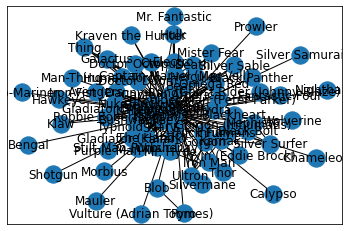

In [108]:
# THIS FUNCTION IS TO ADD EDGES AND NODES INTO THE SOCIAL NETWORK GRAPH
def add(df, graph):
    
#     VARIABLES

#     DF: DATAFRAME OF COMIC 
#     GRAPH: THE SOCIAL NETWORK GRAPH VARIABLE
#     NAMES: ARRAY TO STORE CURRENT CHARACTERS
    
    for comic in np.arange(len(df["characters"])):
        names = []
        for x in np.arange(df["characters"][comic]['available']):
            names.append(df["characters"][comic]["items"][x]["name"])
            for subset in itertools.combinations(names, 2):
                if graph.has_edge(subset[0], subset[1]):
                    graph[subset[0]][subset[1]]['weight'] += 1
                else:
                    graph.add_edge(subset[0], subset[1], weight = 1)
    return graph

# THE FOLLOWING CODE BELOW IS TO CALL THE ADD FUNCTION ON ALL CHARACTERS FROM ALL CHRACTERS
graphed = nx.Graph()
for x in np.arange(1,380):
    comics = m.characters.comics(1009262, limit = 100, format = "comic", titleStartsWith = "Daredevil", startYear = "1964", issueNumber = str(x))
    new_df = pd.DataFrame(comics)
    df = pd.DataFrame(new_df["data"][3])
    add(df, graphed)

nx.draw_networkx(graphed)        

In [109]:
nx.write_gexf(graphed, "Daredevil_SNG.gexf")

In [110]:
# AFTER DOWNLOADING THE GEXF FILE, I USED GEPHI TO VIEW THE GRAPH AND EDIT IT USING THEIR TOOLS